### Importing Libs

In [1]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import Dense, Flatten, Softmax


2023-05-19 14:42:07.224152: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 14:42:07.276130: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 14:42:07.277166: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 14:42:08.322421: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Explore

In [2]:
mnist = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist

In [3]:
HEIGHT, WIDTH = x_train[0].shape
NCLASSES = tf.size(tf.unique(y_train).y)
print("Image height x width is", HEIGHT, "x", WIDTH)
tf.print("There are", NCLASSES, "classes")

Image height x width is 28 x 28
There are 10 classes


The label for image number 12 is 9


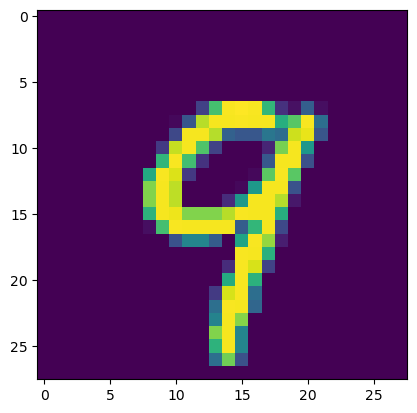

In [4]:
IMGNO = 12
plt.imshow(x_test[IMGNO].reshape(HEIGHT, WIDTH))
print("The label for image number", IMGNO, "is", y_test[IMGNO])

### Build model

In [5]:
def linear_model():
    model = Sequential([Flatten(), Dense(NCLASSES), Softmax()])

    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

    return model

### Input pipeline

In [6]:
BUFFER_SIZE = 5000
BATCH_SIZE = 100


def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label


def load_dataset(training=True):
    (x_train, y_train), (x_test, y_test) = mnist
    x = x_train if training else x_test
    y = y_train if training else y_test
    # One-hot encode the classes
    y = tf.keras.utils.to_categorical(y, NCLASSES)
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    dataset = dataset.map(scale).batch(BATCH_SIZE)
    if training:
        dataset = dataset.shuffle(BUFFER_SIZE).repeat()
    return dataset

In [7]:
def create_shape_test(training):
    dataset = load_dataset(training=training)
    data_iter = dataset.__iter__()
    (images, labels) = data_iter.get_next()
    expected_image_shape = (BATCH_SIZE, HEIGHT, WIDTH)
    expected_label_ndim = 2
    assert images.shape == expected_image_shape
    assert labels.numpy().ndim == expected_label_ndim
    test_name = "training" if training else "eval"
    print("Test for", test_name, "passed!")


create_shape_test(True)
create_shape_test(False)

2023-05-19 14:42:10.305607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]
2023-05-19 14:42:10.305934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype uint8 and shape [60000,28,28]
	 [[{{node Placeholder/_0}}]]


Test for training passed!
Test for eval passed!


2023-05-19 14:42:17.240770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [10000,10]
	 [[{{node Placeholder/_1}}]]


### Training

In [8]:
NUM_EPOCHS = 10
STEPS_PER_EPOCH = 100

model = linear_model()
train_data = load_dataset()
validation_data = load_dataset(training=False)

OUTDIR = "mnist_linear/"
checkpoint_callback = ModelCheckpoint(OUTDIR, save_weights_only=True, verbose=1)
tensorboard_callback = TensorBoard(log_dir=OUTDIR)

history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=NUM_EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    verbose=2,
    callbacks=[checkpoint_callback, tensorboard_callback],
)

Epoch 1/10


2023-05-19 14:42:17.385004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype uint8 and shape [60000,28,28]
	 [[{{node Placeholder/_0}}]]
2023-05-19 14:42:17.385271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [60000,10]
	 [[{{node Placeholder/_1}}]]
2023-05-19 14:42:24.782113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and sha


Epoch 1: saving model to mnist_linear/
100/100 - 8s - loss: 1.3345 - accuracy: 0.6641 - val_loss: 0.8045 - val_accuracy: 0.8266 - 8s/epoch - 79ms/step
Epoch 2/10

Epoch 2: saving model to mnist_linear/
100/100 - 1s - loss: 0.6711 - accuracy: 0.8495 - val_loss: 0.5634 - val_accuracy: 0.8688 - 523ms/epoch - 5ms/step
Epoch 3/10

Epoch 3: saving model to mnist_linear/
100/100 - 1s - loss: 0.5459 - accuracy: 0.8641 - val_loss: 0.4780 - val_accuracy: 0.8830 - 543ms/epoch - 5ms/step
Epoch 4/10

Epoch 4: saving model to mnist_linear/
100/100 - 1s - loss: 0.4631 - accuracy: 0.8791 - val_loss: 0.4230 - val_accuracy: 0.8928 - 533ms/epoch - 5ms/step
Epoch 5/10

Epoch 5: saving model to mnist_linear/
100/100 - 0s - loss: 0.4403 - accuracy: 0.8871 - val_loss: 0.3916 - val_accuracy: 0.8979 - 451ms/epoch - 5ms/step
Epoch 6/10

Epoch 6: saving model to mnist_linear/
100/100 - 0s - loss: 0.4025 - accuracy: 0.8934 - val_loss: 0.3716 - val_accuracy: 0.9018 - 461ms/epoch - 5ms/step
Epoch 7/10

Epoch 7: sa

In [9]:
BENCHMARK_ERROR = 0.12
BENCHMARK_ACCURACY = 1 - BENCHMARK_ERROR

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

assert accuracy[-1] > BENCHMARK_ACCURACY
assert val_accuracy[-1] > BENCHMARK_ACCURACY
print("Test to beat benchmark accuracy passed!")

assert accuracy[0] < accuracy[1]
assert accuracy[1] < accuracy[-1]
assert val_accuracy[0] < val_accuracy[1]
assert val_accuracy[1] < val_accuracy[-1]
print("Test model accuracy is improving passed!")

assert loss[0] > loss[1]
assert loss[1] > loss[-1]
assert val_loss[0] > val_loss[1]
assert val_loss[1] > val_loss[-1]
print("Test loss is decreasing passed!")

Test to beat benchmark accuracy passed!
Test model accuracy is improving passed!
Test loss is decreasing passed!


### Inference

In [10]:
image_numbers = range(0, 10, 1)


def load_prediction_dataset():
    dataset = (x_test[image_numbers], y_test[image_numbers])
    dataset = tf.data.Dataset.from_tensor_slices(dataset)
    dataset = dataset.map(scale).batch(len(image_numbers))
    return dataset


predicted_results = model.predict(load_prediction_dataset())
for index, prediction in enumerate(predicted_results):
    predicted_value = np.argmax(prediction)
    actual_value = y_test[image_numbers[index]]
    if actual_value != predicted_value:
        print("image number: " + str(image_numbers[index]))
        print("the prediction was " + str(predicted_value))
        print("the actual label is " + str(actual_value))
        print("")

1/1 [==============================] - 0s 64ms/step
image number: 8
the prediction was 6
the actual label is 5



2023-05-19 14:42:38.302391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [10]
	 [[{{node Placeholder/_1}}]]


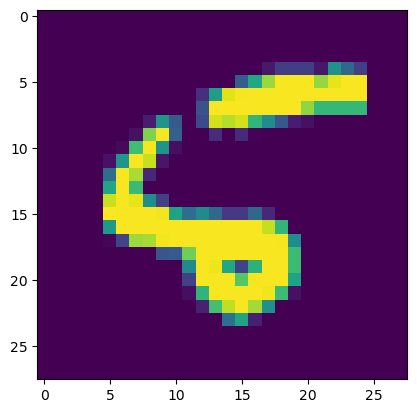

In [11]:
bad_image_number = 8
plt.imshow(x_test[bad_image_number].reshape(HEIGHT, WIDTH));

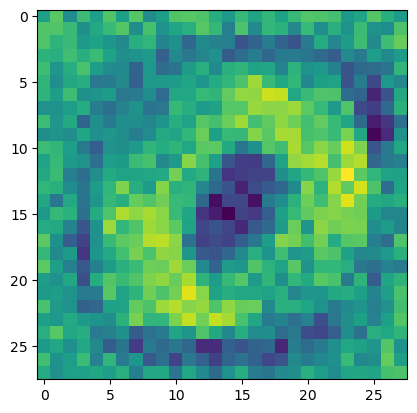

In [12]:
DIGIT = 0 
LAYER = 1 
WEIGHT_TYPE = 0 

dense_layer_weights = model.layers[LAYER].get_weights()
digit_weights = dense_layer_weights[WEIGHT_TYPE][:, DIGIT]
plt.imshow(digit_weights.reshape((HEIGHT, WIDTH)))